In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
def plot_humans():
      df.plot(kind='scatter',
              x='Height',
              y='Weight',
              title='Weight and Height in adults')

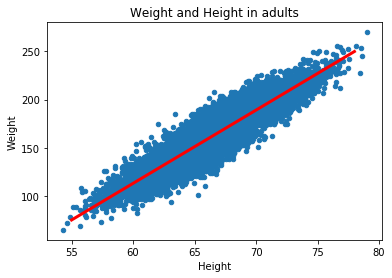

In [6]:
plot_humans()
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [7]:
def line(x, w=0, b=0):
      return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [10]:
yhat = line(x, w=0, b=0)

In [11]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

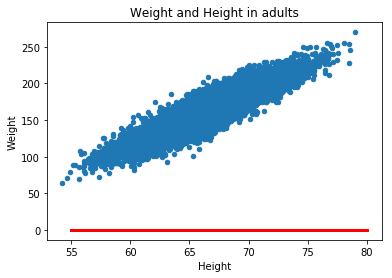

In [12]:
plot_humans()
plt.plot(x, yhat, color='red', linewidth=3)

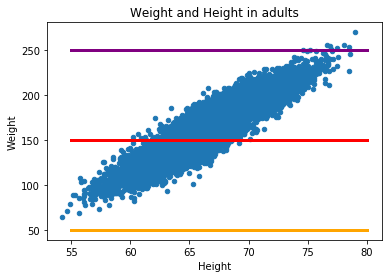

In [13]:
plot_humans()
  # three settings for b "offset" the
plt.plot(x, line(x, b=50), color='orange', linewidth=3)
plt.plot(x, line(x, b=150), color='red', linewidth=3)
plt.plot(x, line(x, b=250), color='purple', linewidth=3)

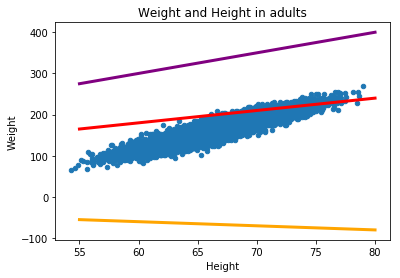

In [14]:
plot_humans()
plt.plot(x, line(x, w=5), color='purple', linewidth=3)
plt.plot(x, line(x, w=3), color='red', linewidth=3)
plt.plot(x, line(x, w=-1), color='orange', linewidth=3)


In [15]:
def mean_squared_error(y_true, y_pred):
      s = (y_true - y_pred)**2
      return s.mean()

In [16]:
X = df[['Height']].values
X

array([[ 73.84701702],
       [ 68.78190405],
       [ 74.11010539],
       ..., 
       [ 63.86799221],
       [ 69.03424313],
       [ 61.94424588]])

In [17]:
X.shape

(10000, 1)

In [18]:
y_true = df['Weight'].values
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [19]:
y_pred = line(X)
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [20]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

In [21]:
y_pred.shape

(10000, 1)

In [22]:
y_pred.ravel().shape

(10000,)

In [23]:
y_true.shape

(10000,)

In [24]:
y_pred = line(X, w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.1224504786412

In [25]:
y_pred = line(X, w=2, b=20)
mean_squared_error(y_true, y_pred.ravel())

708.91295755110946

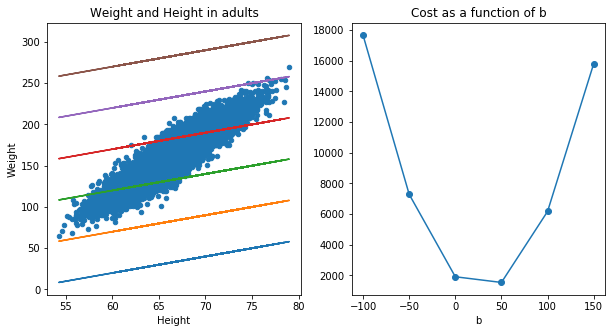

In [27]:
plt.figure(figsize=(10, 5))
# we are going to draw 2 plots in the same figure # first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
    x='Height',
    y='Weight',
    title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = [] # we will append the values of the cost here, for each line for b in bbs:
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [29]:
model = Sequential()

In [30]:
model.add(Dense(1, input_shape=(1,)))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [33]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 81us/step - loss: 826.8691
Epoch 2/40
10000/10000 [==============================] - 0s 24us/step - loss: 556.1071
Epoch 3/40
10000/10000 [==============================] - 0s 25us/step - loss: 502.2564
Epoch 4/40
10000/10000 [==============================] - 0s 25us/step - loss: 488.2056
Epoch 5/40
10000/10000 [==============================] - 0s 24us/step - loss: 423.6836
Epoch 6/40
10000/10000 [==============================] - 0s 24us/step - loss: 375.4047
Epoch 7/40
10000/10000 [==============================] - 0s 26us/step - loss: 343.8245
Epoch 8/40
10000/10000 [==============================] - 0s 27us/step - loss: 319.3754
Epoch 9/40
10000/10000 [==============================] - 0s 27us/step - loss: 280.4317
Epoch 10/40
10000/10000 [==============================] - 0s 24us/step - loss: 262.7376
Epoch 11/40
10000/10000 [==============================] - 0s 25us/step - loss: 245.2717
Epoch 12/40
10000/10000 [=====

In [34]:
y_pred = model.predict(X)

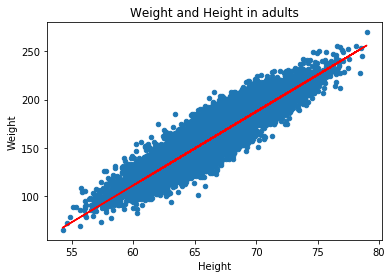

In [35]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [36]:
W, B = model.get_weights()

In [37]:
W

array([[ 7.65698433]], dtype=float32)

In [38]:
B

array([-348.57247925], dtype=float32)

In [39]:
w = W[0, 0]

In [40]:
b = B[0]

In [41]:
-b/w

45.523468

In [42]:
from sklearn.metrics import r2_score

In [43]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.852


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [46]:
len(X_train)

8000

In [47]:
len(X_test)

2000

In [48]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [49]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [50]:
from sklearn.metrics import mean_squared_error as mse

In [52]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train,
  y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test,
  y_test_pred)))

The Mean Squared Error on the Train set is:	155.2
The Mean Squared Error on the Test set is:	157.7


In [53]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train,
  y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test,
  y_test_pred)))

The R2 score on the Train set is:	0.850
The R2 score on the Test set is:	0.846


In [55]:
df = pd.read_csv('./data/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


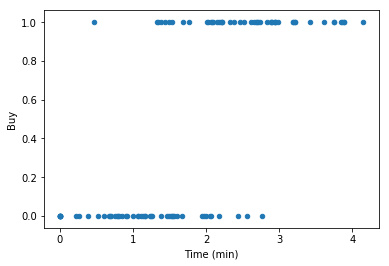

In [56]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [57]:
X = df[['Time (min)']].values
y = df['Buy'].values

In [58]:
model.fit(X, y, epochs=100, verbose=0)

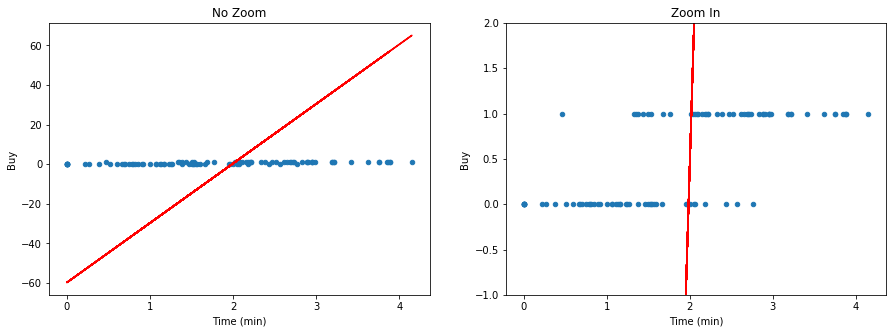

In [59]:
y_pred = model.predict(X)

plt.figure(figsize=(15, 5))
ax = plt.subplot(121)
df.plot(kind='scatter', x='Time (min)', y='Buy', ax=ax)
plt.plot(X, y_pred, color='red')
plt.title('No Zoom')

ax = plt.subplot(122)
df.plot(kind='scatter', x='Time (min)', y='Buy', ax=ax)
plt.plot(X, y_pred, color='red')
plt.ylim((-1,2))
plt.title('Zoom In')


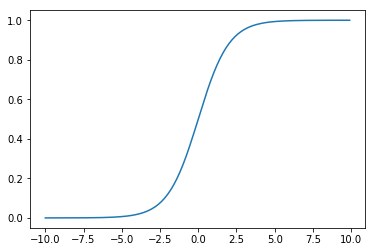

In [60]:
def sigmoid(z):
      return 1.0/(1.0 + np.exp(-z))
z = np.arange(-10, 10, 0.1)
plt.plot(z, sigmoid(z))

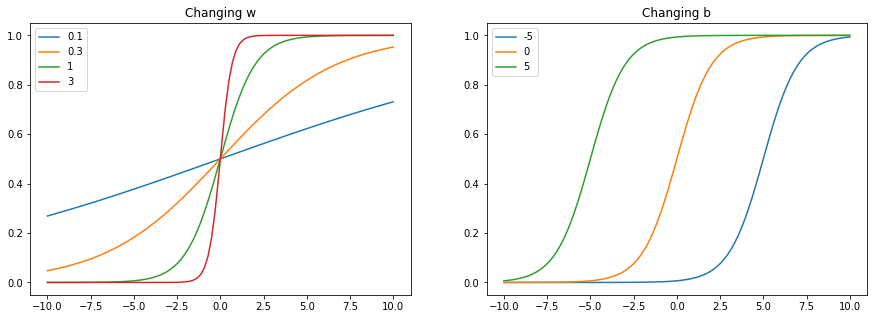

In [61]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 5))
plt.subplot(121)

ws = [0.1, 0.3, 1, 3]
for w in ws:
    plt.plot(x, sigmoid(line(x, w=w)))

plt.legend(ws)
plt.title('Changing w')
  
plt.subplot(122)
bs = [-5, 0, 5]
for b in bs:
    plt.plot(x, sigmoid(line(x, w=1, b=b)))

plt.legend(bs)
plt.title('Changing b')

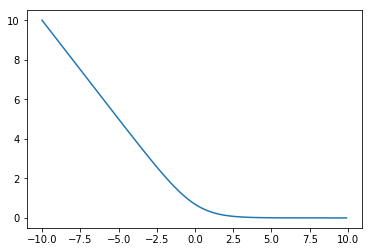

In [62]:
plt.plot(z, -np.log(sigmoid(z)))

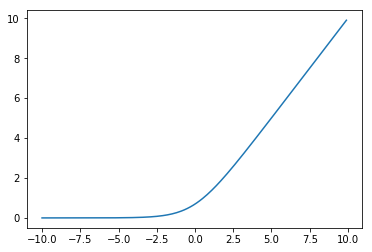

In [63]:
plt.plot(z, -np.log(1 - sigmoid(z)))

In [64]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [65]:
from keras.layers import Activation

In [66]:
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


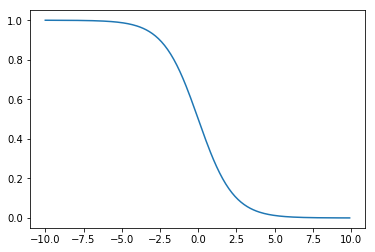

In [67]:
plt.plot(z, model.predict(z))

In [68]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9438 - acc: 0.5000
Epoch 2/25
100/100 [==============================] - 0s 60us/step - loss: 0.6335 - acc: 0.5400
Epoch 3/25
100/100 [==============================] - 0s 61us/step - loss: 0.6402 - acc: 0.5700
Epoch 4/25
100/100 [==============================] - 0s 58us/step - loss: 0.5802 - acc: 0.6700
Epoch 5/25
100/100 [==============================] - 0s 62us/step - loss: 0.5429 - acc: 0.7300
Epoch 6/25
100/100 [==============================] - 0s 55us/step - loss: 0.5359 - acc: 0.7100
Epoch 7/25
100/100 [==============================] - 0s 67us/step - loss: 0.5064 - acc: 0.8000
Epoch 8/25
100/100 [==============================] - 0s 60us/step - loss: 0.4966 - acc: 0.7800
Epoch 9/25
100/100 [==============================] - 0s 58us/step - loss: 0.4778 - acc: 0.8000
Epoch 10/25
100/100 [==============================] - 0s 57us/step - loss: 0.4747 - acc: 0.8000
Epoch 11/25
100/100 [===================

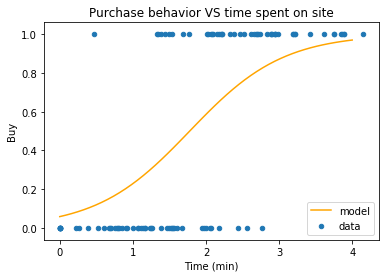

In [70]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
               title='Purchase behavior VS time spent on site')
temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [71]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [72]:
from sklearn.metrics import accuracy_score
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
params = model.get_weights()
params

[array([[ 1.56424892]], dtype=float32), array([-2.77975798], dtype=float32)]

In [75]:
params = [np.zeros(w.shape) for w in params]
params

[array([[ 0.]]), array([ 0.])]

In [76]:
model.set_weights(params)

In [77]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X)
  > 0.5)))

The accuracy score is 0.500


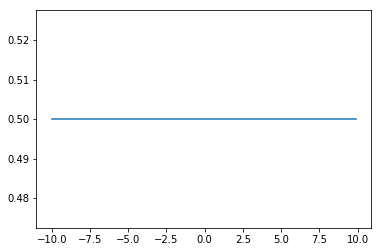

In [78]:
plt.plot(z, model.predict(z))

In [79]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
80/80 [==============================] - 0s 87us/step - loss: 0.6655 - acc: 0.7125
Epoch 2/25
80/80 [==============================] - 0s 60us/step - loss: 0.6105 - acc: 0.5875
Epoch 3/25
80/80 [==============================] - 0s 63us/step - loss: 0.5840 - acc: 0.7000
Epoch 4/25
80/80 [==============================] - 0s 61us/step - loss: 0.5620 - acc: 0.6875
Epoch 5/25
80/80 [==============================] - 0s 63us/step - loss: 0.5687 - acc: 0.7250
Epoch 6/25
80/80 [==============================] - 0s 62us/step - loss: 0.5275 - acc: 0.7625
Epoch 7/25
80/80 [==============================] - 0s 59us/step - loss: 0.5127 - acc: 0.7875
Epoch 8/25
80/80 [==============================] - 0s 63us/step - loss: 0.5030 - acc: 0.7875
Epoch 9/25
80/80 [==============================] - 0s 61us/step - loss: 0.5050 - acc: 0.8000
Epoch 10/25
80/80 [==============================] - 0s 62us/step - loss: 0.4815 - acc: 0.8125
Epoch 11/25
80/80 [==============================] - 0s 66u

In [80]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train,
  model.predict(X_train) > 0.5)))

The train accuracy score is 0.825


In [81]:
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test,
  model.predict(X_test) > 0.5)))

The test accuracy score is 0.850


In [82]:
def build_logistic_regression_model():
      model = Sequential()
      model.add(Dense(1, input_dim=1, activation='sigmoid'))
      model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
      return model

In [84]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=25, verbose=0)

In [85]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)
scores

array([ 0.82352941,  0.75757576,  0.84848485])

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
      cm = confusion_matrix(y_true, y_pred)
      pred_labels = ['Predicted '+ l for l in labels]
      df = pd.DataFrame(cm, index=labels, columns=pred_labels)
      return df

In [88]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:  	0.820
F1 Score:	0.820


In [90]:
from sklearn.metrics import classification_report 
print(classification_report(y, y_class_pred))


             precision    recall  f1-score   support

          0       0.82      0.82      0.82        50
          1       0.82      0.82      0.82        50

avg / total       0.82      0.82      0.82       100



In [92]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [93]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [94]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


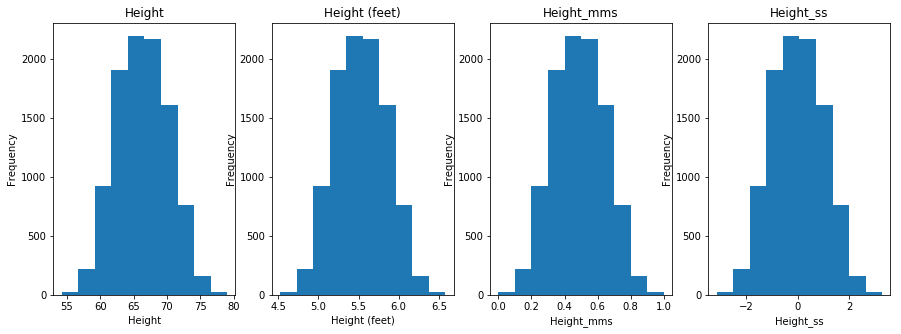

In [99]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)